# Explore and understand the performance of employees: A descriptive analysis using python

Problem: A company wants to analyse the distribution of employee performance in order to understand the differences in performance.

Objective: To study the distributions of performance scores and hours of absences and those have been worked on in order to detect factors for improvement.

To achieve this objective, we will:

- Carry out univariate and bivariate descriptive analyses on the variables of interest, which are mainly the performance score and the number of hours of absence

- Draw graphs to represent the distribution of the various variables of interest


- Carry out statistical tests to see whether there is an association between these two variables

The dataset name is "Human Resources Data Set" and was dowloaded on kaggle: https://www.kaggle.com/datasets/rhuebner/human-resources-data-set


# I-Overview of the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import the data set
df=pd.read_csv('HRDataset_v14.csv')
pd.set_option('display.max_columns', None)
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


## 1-Data cleaning

In [4]:
#Describe the shape of the dataset
x=(df.shape)
for i in x:
    print ('Our dataset has:', x[0], 'rows and',x[1], 'columns')

Our dataset has: 311 rows and 36 columns
Our dataset has: 311 rows and 36 columns


In [5]:
#Looking for the different data types and giving the right data type for each feature
df.info()

#Change the date columns type into date format
df['DateofHire']=pd.to_datetime(df['DateofHire'])
df['DateofTermination']=pd.to_datetime(df['DateofTermination'])

#Rename the labels of the sex column
df['Sex']=df['Sex'].astype('category')
df["Sex"]=df["Sex"].cat.rename_categories({"F":"Female", "M":"Male"})
df['Sex']=df['Sex'].astype('object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [6]:
# Verifying our data types change
df.dtypes

Employee_Name                         object
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                                   object
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTerm

### Looking for duplicate values

In [7]:
#Looking for duplicates
duplicates = df[df.duplicated()]

# Show duplicates
print("Duplicates :")
print(duplicates)

Duplicates :
Empty DataFrame
Columns: [Employee_Name, EmpID, MarriedID, MaritalStatusID, GenderID, EmpStatusID, DeptID, PerfScoreID, FromDiversityJobFairID, Salary, Termd, PositionID, Position, State, Zip, DOB, Sex, MaritalDesc, CitizenDesc, HispanicLatino, RaceDesc, DateofHire, DateofTermination, TermReason, EmploymentStatus, Department, ManagerName, ManagerID, RecruitmentSource, PerformanceScore, EngagementSurvey, EmpSatisfaction, SpecialProjectsCount, LastPerformanceReview_Date, DaysLateLast30, Absences]
Index: []


We did not have duplicate values

### Missing values

In [8]:
# Count of missing values
missing_values=df.isnull().sum()
missing_values.sort_values(ascending=False)

#Proportion of missing values
missing_proportion=missing_values/len(df)
missing_proportion.sort_values(ascending=False)

#missing values table
missing_table=pd.concat([missing_values, missing_proportion], axis=1)
missing_table.columns = ['Count of missing values', 'Proportion of missing values']
missing_table.sort_values(by='Count of missing values', ascending=False)


,Count of missing values,Proportion of missing values
DateofTermination,207,0.665595
ManagerID,8,0.025723
Employee_Name,0,0.000000
EmpID,0,0.000000
MaritalStatusID,0,0.000000
MarriedID,0,0.000000
GenderID,0,0.000000
EmpStatusID,0,0.000000
FromDiversityJobFairID,0,0.000000
Salary,0,0.000000


We had 207 missing values in the date of termination column and 8 in the ManagerID column

# 2-Univariate analysis

## 2.1.Quantitative variables

In [9]:
#Descriptive analysis of the numeric columns
numeric=df._get_numeric_data().columns
print(numeric)

Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Zip', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences'],
      dtype='object')


In [10]:
##Selecting the numerical variables that we will use for univariate analysis
numeric_vars=['Salary','SpecialProjectsCount','DaysLateLast30','Absences','EmpSatisfaction','EngagementSurvey']
df_num=df[numeric_vars]
df_num.head()

,Salary,SpecialProjectsCount,DaysLateLast30,Absences,EmpSatisfaction,EngagementSurvey
0,62506,0,0,1,5,4.60
1,104437,6,0,17,3,4.96
2,64955,0,0,3,3,3.02
3,64991,0,0,15,5,4.84
4,50825,0,0,2,4,5.00


In [13]:
#Summary statistics
from tabulate import tabulate
summary=df_num.describe()
print('Summary statistics\n',tabulate(summary, headers='keys', tablefmt='fancy_grid', numalign="center"))


Summary statistics
 ╒═══════╤══════════╤════════════════════════╤══════════════════╤════════════╤═══════════════════╤════════════════════╕
│       │  Salary  │  SpecialProjectsCount  │  DaysLateLast30  │  Absences  │  EmpSatisfaction  │  EngagementSurvey  │
╞═══════╪══════════╪════════════════════════╪══════════════════╪════════════╪═══════════════════╪════════════════════╡
│ count │   311    │          311           │       311        │    311     │        311        │        311         │
├───────┼──────────┼────────────────────────┼──────────────────┼────────────┼───────────────────┼────────────────────┤
│ mean  │ 69020.7  │        1.21865         │     0.414791     │  10.2379   │      3.89068      │        4.11        │
├───────┼──────────┼────────────────────────┼──────────────────┼────────────┼───────────────────┼────────────────────┤
│ std   │ 25156.6  │        2.34942         │     1.29452      │   5.8526   │     0.909241      │      0.789938      │
├───────┼──────────┼────────

Salary


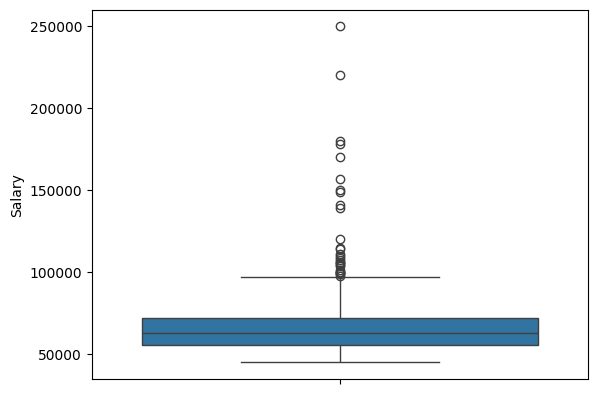

SpecialProjectsCount


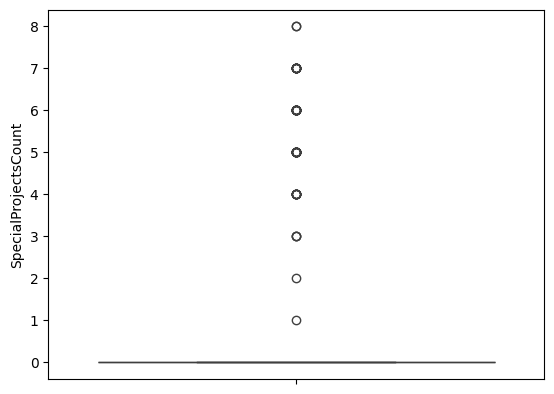

DaysLateLast30


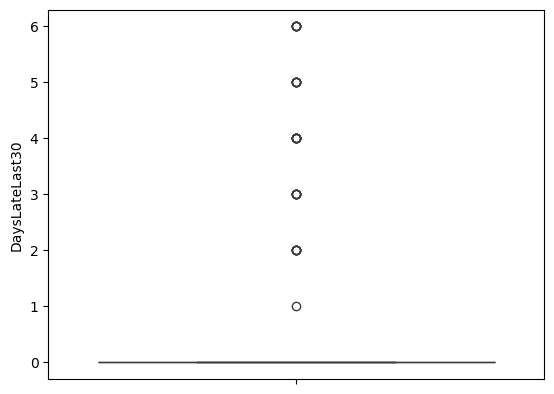

Absences


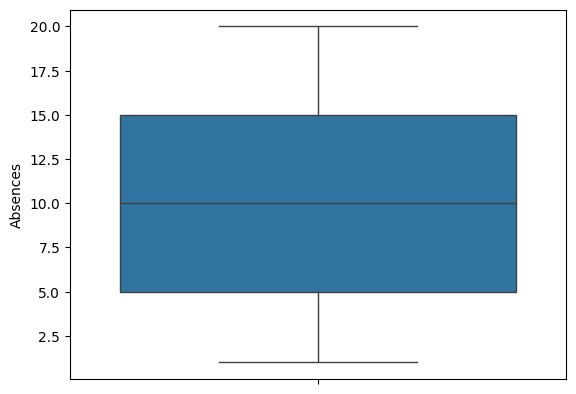

EmpSatisfaction


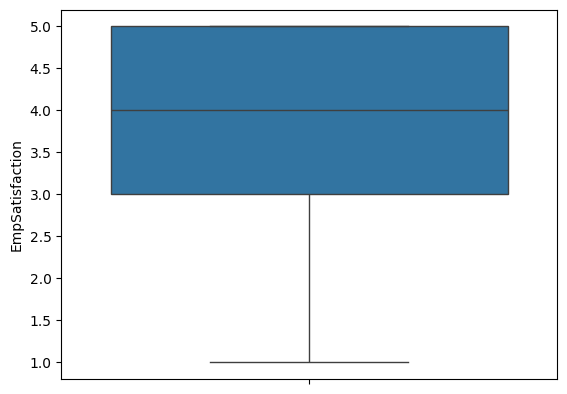

EngagementSurvey


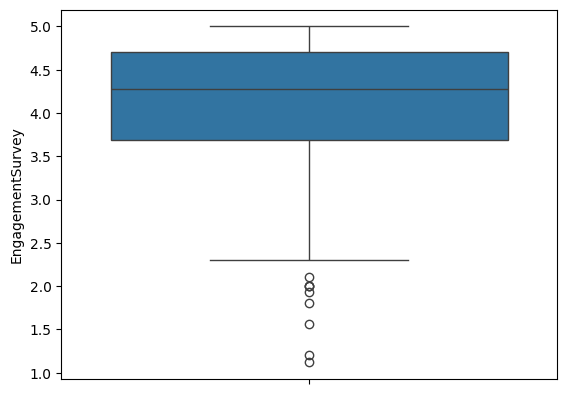

In [14]:
#Boxplot of the numeric features
for var in df_num:
    print(var)
    sns.boxplot(y=var, data=df_num)
    plt.show()

Now we will seek for the outliers in each column by the isolation forest method

In [18]:
#Detect outliers by using the isolation forest
from sklearn.ensemble import IsolationForest

# Apply the Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(df_num)

# Ajdd outlier label to the dataframe
df_num['Outlier'] = outlier_labels

# Display the outliers
outliers = df_num[df_num['Outlier'] == -1]
print("Outliers detected:")
print(outliers)


Outliers detected:
     Salary  SpecialProjectsCount  DaysLateLast30  Absences  EmpSatisfaction  \
29    63000                     6               0        14                2   
54    68051                     0               3         3                2   
55   170500                     0               0        15                5   
61    85028                     8               0        19                5   
64    56991                     3               2         2                4   
67    61568                     0               6         5                3   
69    53189                     0               4         9                2   
72    59231                     0               2        17                1   
83    56847                     0               2         5                1   
84    60340                     0               5        16                4   
86    99280                     4               4        19                5   
90    64057          

C:\Users\Yves-Ricky\AppData\Local\Temp\ipykernel_14892\3895289294.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Outlier'] = outlier_labels


## 2.2.Univariate analysis for numeric variables

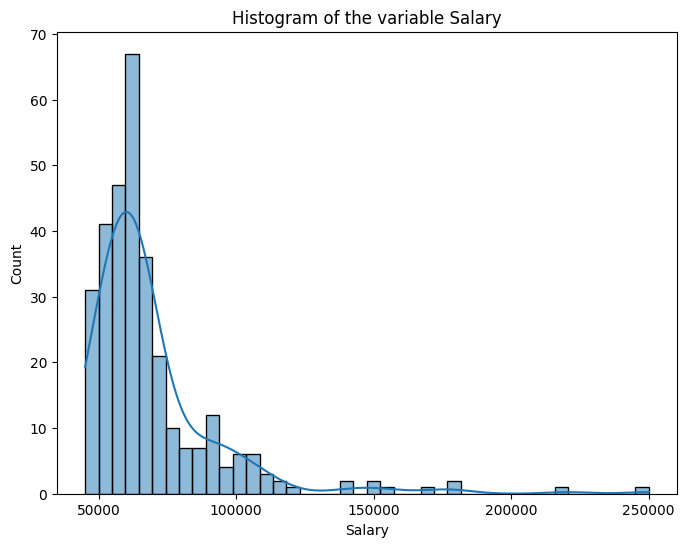

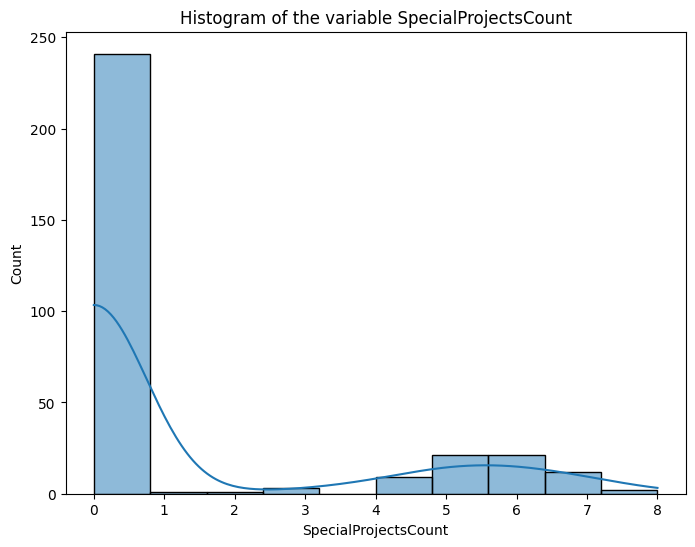

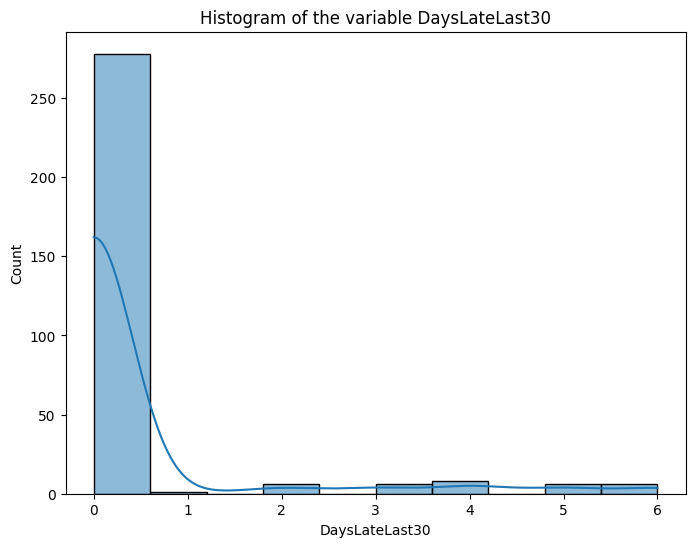

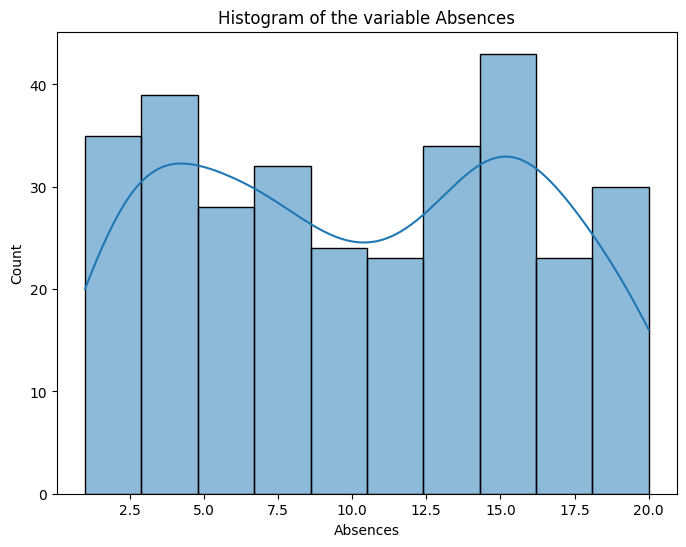

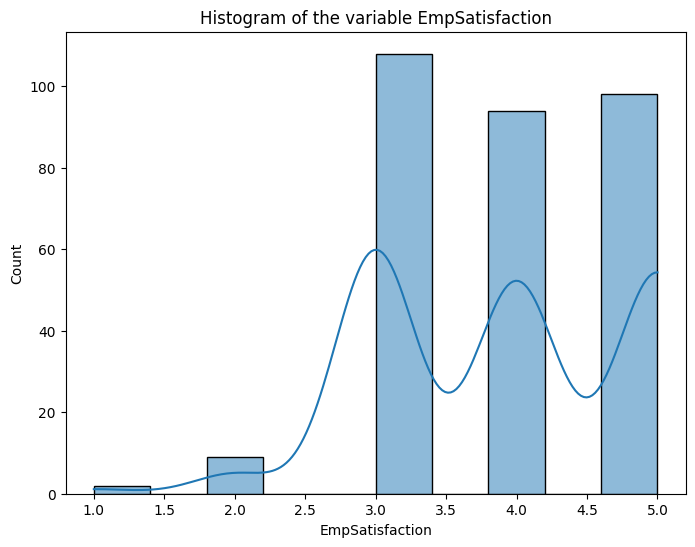

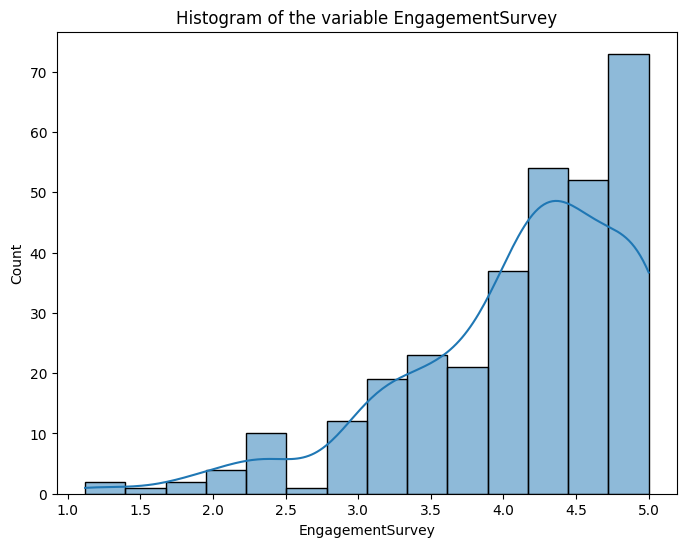

In [199]:
# Distribution of the variable with histogram
for column in df_num:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_num, x=column, kde=True)
    plt.title(f"Histogram of the variable {column}")
    plt.show()

In [200]:
#Normality with the shapiro wilik test
for var in df_num:
    stat, p=shapiro(df_num[var])
    print('name of the variable: ',var,'  //statistic_value: ', stat, '  //The pvalue: ', p)

name of the variable:  Salary   //statistic_value:  0.6854954238514676   //The pvalue:  1.1153520404668046e-23
name of the variable:  SpecialProjectsCount   //statistic_value:  0.5542755259507065   //The pvalue:  2.0902197908552197e-27
name of the variable:  DaysLateLast30   //statistic_value:  0.3571957355305194   //The pvalue:  1.2442932932159195e-31
name of the variable:  Absences   //statistic_value:  0.938749219230401   //The pvalue:  4.82023029622776e-10
name of the variable:  EmpSatisfaction   //statistic_value:  0.8421196412268894   //The pvalue:  3.6613724370173964e-17
name of the variable:  EngagementSurvey   //statistic_value:  0.9010829015480158   //The pvalue:  2.20581353716323e-13


With these results, we can see that we dont have any normal distribution between our variables

## 2.3.Univariate analysis for Qualitative variables

In [152]:
categorical=df.dtypes[df.dtypes=='object'].index
print (categorical)

Index(['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'TermReason',
       'EmploymentStatus', 'Department', 'ManagerName', 'RecruitmentSource',
       'PerformanceScore', 'LastPerformanceReview_Date'],
      dtype='object')


In [201]:
#Overview of our categorical variables
df_cat=df[categorical]
df_cat.head()

,Employee_Name,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,LastPerformanceReview_Date
0,"Adinolfi, Wilson K",Production Technician I,MA,07/10/83,M,Single,US Citizen,No,White,N/A-StillEmployed,Active,Production,Michael Albert,LinkedIn,Exceeds,1/17/2019
1,"Ait Sidi, Karthikeyan",Sr. DBA,MA,05/05/75,M,Married,US Citizen,No,White,career change,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets,2/24/2016
2,"Akinkuolie, Sarah",Production Technician II,MA,09/19/88,Female,Married,US Citizen,No,White,hours,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets,5/15/2012
3,"Alagbe,Trina",Production Technician I,MA,09/27/88,Female,Married,US Citizen,No,White,N/A-StillEmployed,Active,Production,Elijiah Gray,Indeed,Fully Meets,1/3/2019
4,"Anderson, Carol",Production Technician I,MA,09/08/89,Female,Divorced,US Citizen,No,White,return to school,Voluntarily Terminated,Production,Webster Butler,Google Search,Fully Meets,2/1/2016


Our Main taget variable is the performance score. So, we will analyze this feature

In [157]:
df_cat['PerformanceScore'].unique()
df_cat['PerformanceScore'].value_counts()

PerformanceScore
Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: count, dtype: int64

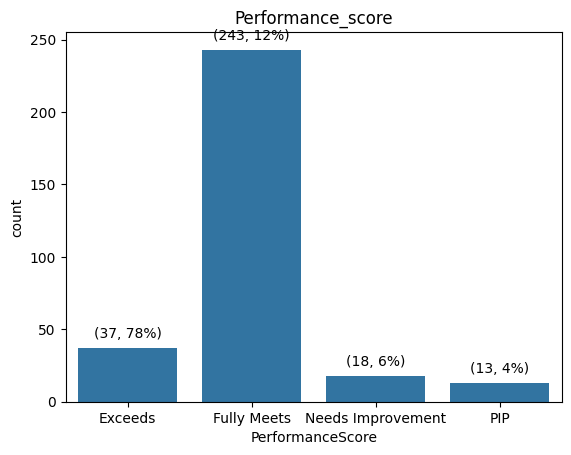

In [208]:
#Bar graph with the Count and percentage of the performance score
prop_df = df_cat["PerformanceScore"].value_counts(normalize=True).reset_index()
prop_df.columns = ["PerformanceScore", "proportion"]

ax = sns.countplot(x="PerformanceScore", data=df_cat)
plt.title("Performance_score")

for p, prop, count in zip(ax.patches, prop_df["proportion"], df_cat["PerformanceScore"].value_counts().sort_index()):
    ax.annotate(f'({count}, {prop:.0%})', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

# 3-Bivariate analysis

## 3.1.Quantitative bivariate analysis

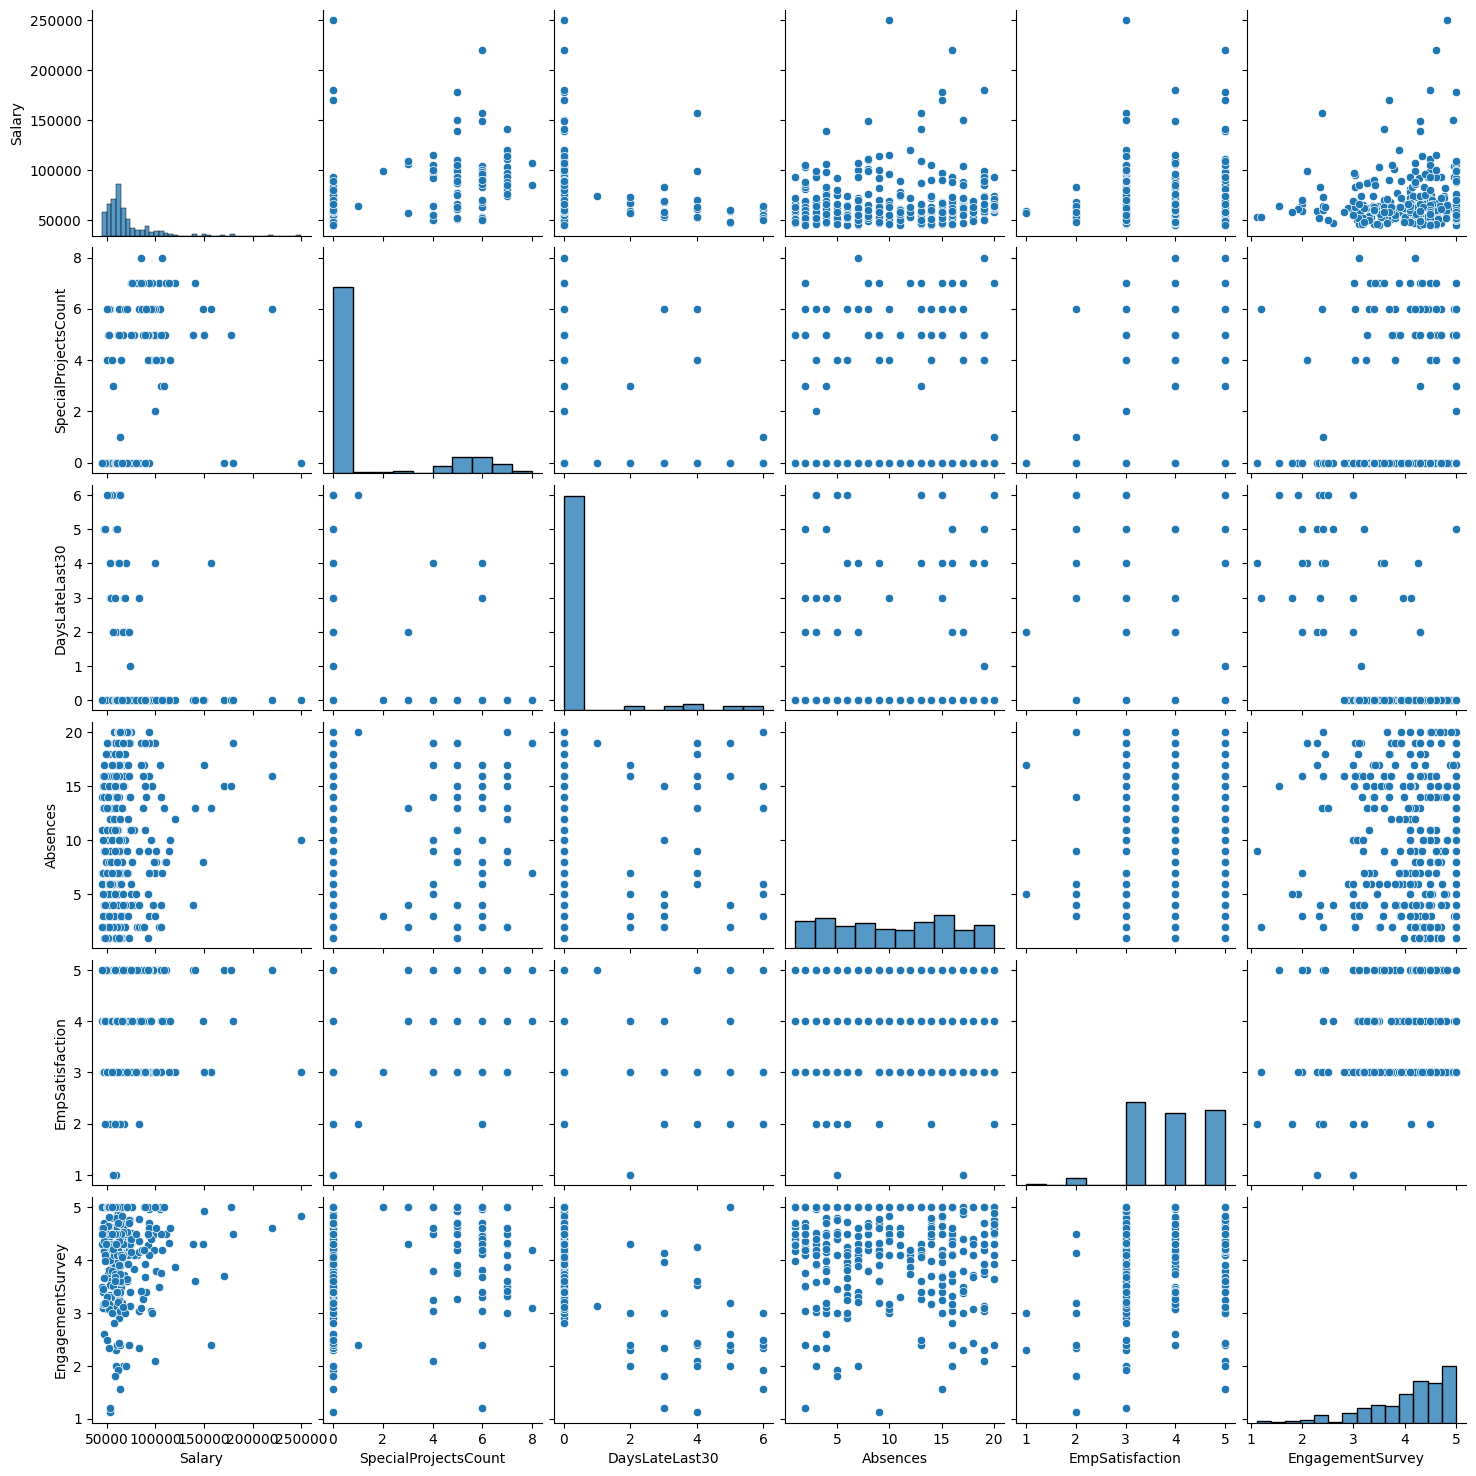

In [209]:

sns.pairplot(df_num,kind="scatter")

<Axes: >

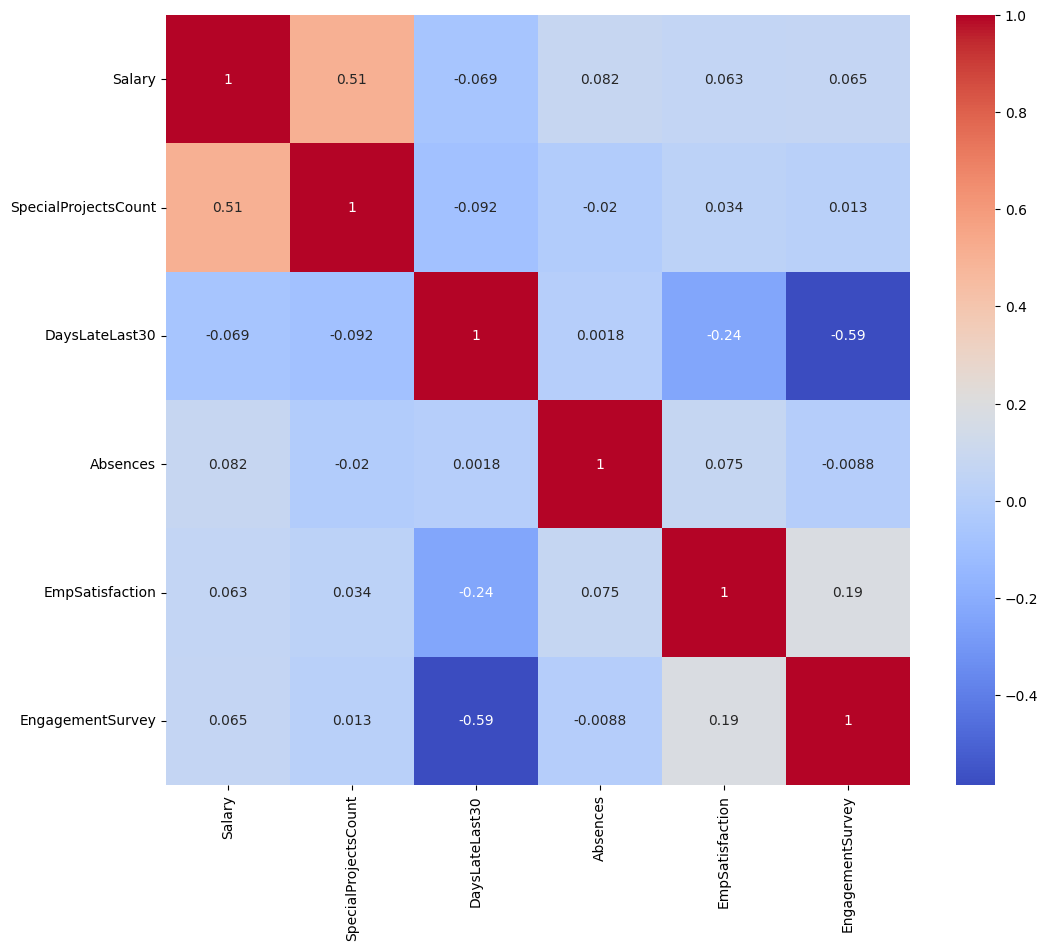

In [211]:
#Correlation matrix
corr_matrix = df_num.corr()

plt.figure(figsize=(12, 10))
# Display the as heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [212]:
df_num.head()

,Salary,SpecialProjectsCount,DaysLateLast30,Absences,EmpSatisfaction,EngagementSurvey
0,62506,0,0,1,5,4.60
1,104437,6,0,17,3,4.96
2,64955,0,0,3,3,3.02
3,64991,0,0,15,5,4.84
4,50825,0,0,2,4,5.00


In [213]:
#Spearman coefficient between special project count and Days Late Last 30 because we have seen 
#correlation coefficient of spearman
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau
spearmanr(df_num['DaysLateLast30'], df_num['SpecialProjectsCount'])

SignificanceResult(statistic=np.float64(-0.07201953737774092), pvalue=np.float64(0.20529497455840606))

No correlation

## 3.2.Bivariate qualitative analysis

In [214]:

from scipy.stats import chi2_contingency

#1-Contingency table between sex and performance score
contingency_table = pd.crosstab(df_cat['Sex'], df_cat['PerformanceScore'])
print('Performance by Sex\n', tabulate(contingency_table, headers='keys', tablefmt='fancy_grid', numalign="center"))

# Chi-sqaure test
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)
# Show the results
print("chi-quare statistic :", chi2_stat)
print("P-value :", p_value)
print("Degree of ffreedom :", dof)
print("expected frequencies :\n", expected_freq)

#2-Contingency table between between Department and performance score
contingency_table2 = pd.crosstab(df_cat['Department'], df_cat['PerformanceScore'])
print('Performance by Department\n', tabulate(contingency_table2, headers='keys', tablefmt='fancy_grid', numalign="center"))

#  chi-square
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table2)
# show résultats
print("chi-quare statistic :", chi2_stat)
print("P-value :", p_value)
print("Degree of ffreedom :", dof)
print("expected frequencies :\n", expected_freq)

# 3- Contingency table between  between employment status and performance score
contingency_table3 = pd.crosstab(df_cat['EmploymentStatus'], df_cat['PerformanceScore'])
print('Performance by EmploymentStatus\n', tabulate(contingency_table3, headers='keys', tablefmt='fancy_grid', numalign="center"))

# chi-square
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table3)
# Afficher les résultats
print("chi-quare statistic :", chi2_stat)
print("P-value :", p_value)
print("Degree of ffreedom :", dof)
print("expected frequencies :\n", expected_freq)


#V of Cramer
n = contingency_table3.sum().sum()
min_dim = min(contingency_table3.shape) - 1
cramer_v = np.sqrt(chi2_stat / (n * min_dim))

# Display the Cramer-V
print("Coefficient de Cramér-V :", cramer_v)

Performance by Sex
 ╒════════╤═══════════╤═══════════════╤═════════════════════╤═══════╕
│ Sex    │  Exceeds  │  Fully Meets  │  Needs Improvement  │  PIP  │
╞════════╪═══════════╪═══════════════╪═════════════════════╪═══════╡
│ Female │    20     │      142      │          9          │   5   │
├────────┼───────────┼───────────────┼─────────────────────┼───────┤
│ M      │    17     │      101      │          9          │   8   │
╘════════╧═══════════╧═══════════════╧═════════════════════╧═══════╛
chi-quare statistic : 2.4914019981664017
P-value : 0.47684693899616526
Degree of ffreedom : 3
expected frequencies :
 [[ 20.93890675 137.51768489  10.18649518   7.35691318]
 [ 16.06109325 105.48231511   7.81350482   5.64308682]]
Performance by Department
 ╒══════════════════════╤═══════════╤═══════════════╤═════════════════════╤═══════╕
│ Department           │  Exceeds  │  Fully Meets  │  Needs Improvement  │  PIP  │
╞══════════════════════╪═══════════╪═══════════════╪═════════════════════╪═

We have a statistical association between the score of performance and the employee status. So we can make the V of Cramer to
find the strenght of the association

In [217]:
#V of Cramer
n = contingency_table3.sum().sum()
min_dim = min(contingency_table3.shape) - 1
cramer_v = np.sqrt(chi2_stat / (n * min_dim))

# Afficher le coefficient de Cramér-V
print("Coefficient of Cramér-V :", cramer_v)

Coefficient of Cramér-V : 0.20566319417448015


the strenght is very low

## Bivariate analysis between the performance score and the absences

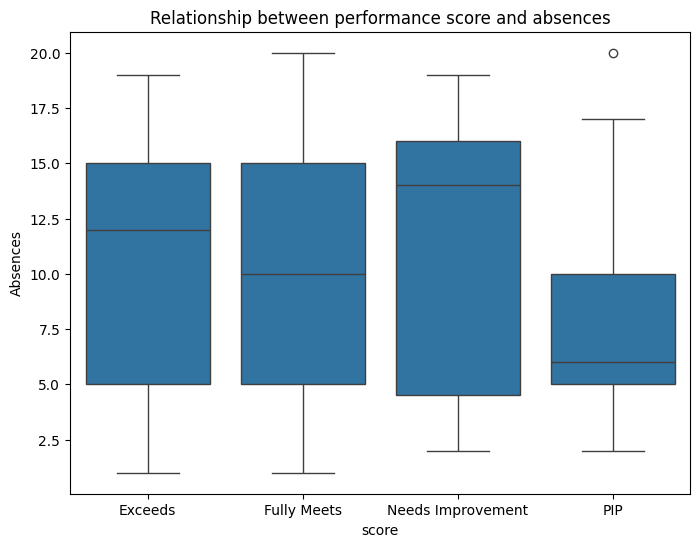

In [219]:

# boxplot of the relationship between performance score and absences in the HR data set
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='PerformanceScore', y='Absences')
plt.xlabel('score')
plt.ylabel('Absences')
plt.title('Relationship between performance score and absences')
plt.show()

We can see that the median of the absences of those who need improvement is the highest

In [229]:
#Number of absences by performance score
tab=df.groupby('PerformanceScore')['Absences'].count()
print(tab)
tab2= pd.crosstab(df['Absences'].count(), df_cat['PerformanceScore'])
tab2

PerformanceScore
Exceeds               37
Fully Meets          243
Needs Improvement     18
PIP                   13
Name: Absences, dtype: int64


PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
row_0,,,,
311,37,243,18,13


But the number of absences of those who fully meets at work is the highest

## Association between performance and absences

Given that the absence variable did not have a normal distribution, we will use the Kruskal Wallis test to study the association between the number of absences and the performance score. 

In [218]:
#kruskall wallis
from scipy.stats import shapiro, ttest_ind, f_oneway, mannwhitneyu, kruskal
Exceeds = df[df['PerformanceScore'] == 'Exceeds']['Absences']
Fully_Meets= df[df['PerformanceScore'] == 'Fully Meets']['Absences']
Needs_Improvement = df[df['PerformanceScore'] == 'Needs Improvement']['Absences']
PIP = df[df['PerformanceScore'] == 'PIP']['Absences']


kruskal_stat, kruskal_p_value = kruskal(Exceeds,Fully_Meets, Needs_Improvement, PIP)
print("Statistique H of Kruskal-Wallis :", kruskal_stat)
print("P-value (Kruskal-Wallis) :", kruskal_p_value)

Statistique H of Kruskal-Wallis : 1.8426840193019722
P-value (Kruskal-Wallis) : 0.6056907547852708


There is no association between the performance score and the number of absences 

# Conclusion

Based on our analysis, we can draw the following conclusions:
-There is no association between the number of absences and the performance score. However, more than half of those with the highest number of absences had to make an effort at work. The company should therefore implement policies to ensure rigour in this area.
-Secondly, the descriptive analyses show that women are the ones who excel the most at work, and the “production” department is the one with the most good workers.